# Test einlesen tiff

In [13]:
# Import Modules

from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
# from rasterio.plot import plotting_extent
# from rasterio.plot import show
# from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

# Read Data

In [2]:
path = 'C:/Users/fgrassxx/Nextcloud/Master_Data_Science/2_Semester/Projekt_Data_Science_1_SS22/Daten_Gyrocopter/Oldenburg/Hyperspektral/Oldenburg-all.tif'
from PIL import Image
im = open(path)


In [3]:
S_sentinel_bands = glob(path)
S_sentinel_bands.sort()
S_sentinel_bands

['C:/Users/fgrassxx/Nextcloud/Master_Data_Science/2_Semester/Projekt_Data_Science_1_SS22/Daten_Gyrocopter/Oldenburg/Hyperspektral/Oldenburg-all.tif']

In [5]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
      for bands in range(1,101):
          l.append(f.read(bands))

In [6]:
# l = []
# for i in S_sentinel_bands:
#   with rio.open(i, 'r') as f:
#       l.append(f.read())


In [7]:
arr_st = np.stack(l)

In [8]:
print(f'Height: {arr_st.shape[1]}\nWidth: {arr_st.shape[2]}\nBands: {arr_st.shape[0]}')

Height: 1980
Width: 3500
Bands: 100


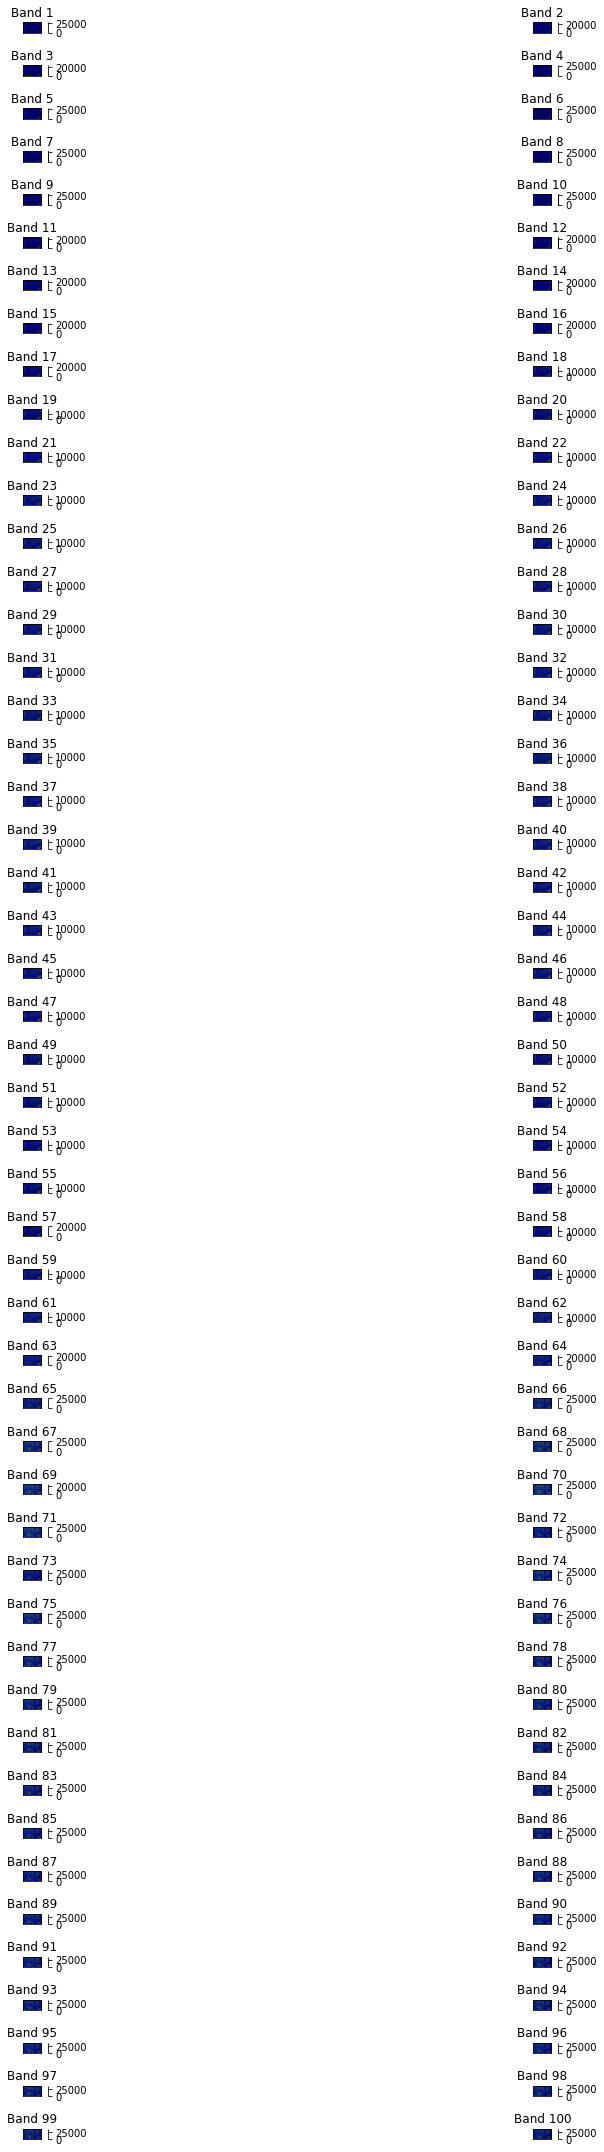

In [9]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 30), cols = 2, cbar = True)
plt.show()

## RGB Composite Image

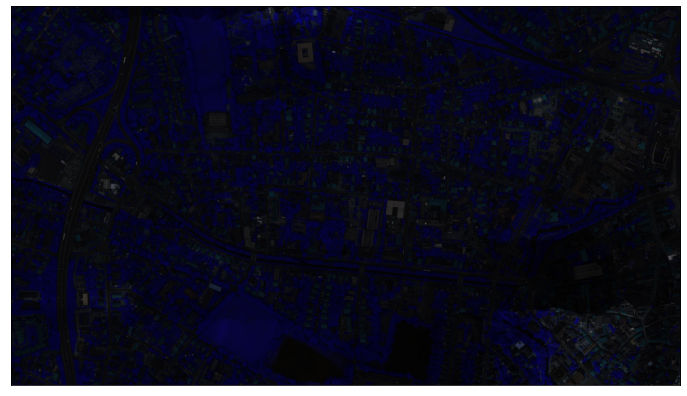

In [12]:
rgb = ep.plot_rgb(arr_st,
                  rgb=(20,50,90),
                  figsize=(12, 16), 
                  # title='RGB Composite Image'
                  )

plt.show()

In [43]:
ep.plot_rgb(
    img,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.02,
    figsize=(12, 16),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()


In [30]:
path = 'C:/Users/fgrassxx/Nextcloud/Master_Data_Science/2_Semester/Projekt_Data_Science_1_SS22/Daten_Gyrocopter/Oldenburg/Hyperspektral/Oldenburg-all.dat.enp'

import spectral.io.envi as envi

lib = envi.open(path)

lib

FileNotAnEnviHeader: File does not appear to be an ENVI header (appears to be a binary file).

In [40]:
import spectral.io.envi as envi
from pathlib import Path

datapath = Path(r'C:/Users/fgrassxx/Nextcloud/Master_Data_Science/2_Semester/Projekt_Data_Science_1_SS22/Daten_Gyrocopter/Oldenburg/Hyperspektral')

header_file = str(datapath / 'Oldenburg-all.hdr')
spectral_file = str(datapath / 'Oldenburg-all.dat')

In [41]:
numpy_ndarr = envi.open(header_file, spectral_file)

img = numpy_ndarr.read_bands([10, 11, 12])  # select the bands

# Here, img is an numpy nd-array

print(img.shape)


(1980, 3500, 3)


## Data Distribution of Bands

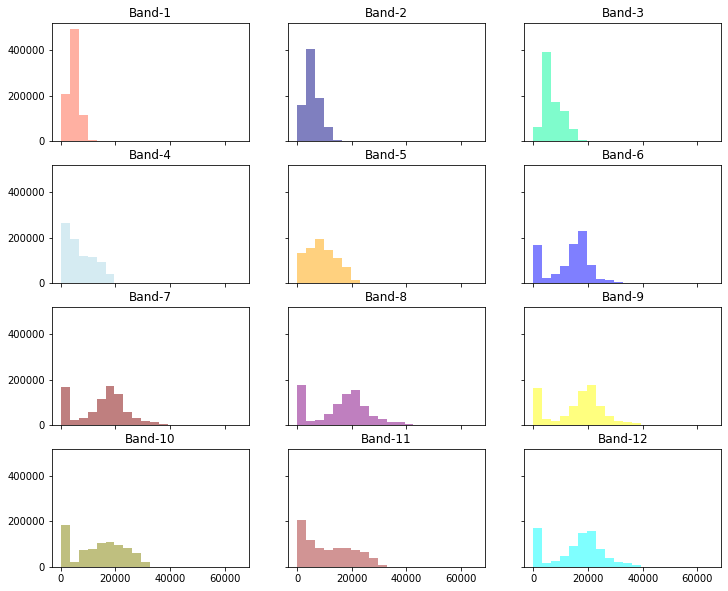

In [9]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

# Preprocessing 

In [10]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(689, 1200, 12)

In [11]:
x.reshape(-1, 12).shape, 954*298

((826800, 12), 284292)

In [12]:
from sklearn.preprocessing import StandardScaler

X_data = x.reshape(-1, 12)

scaler = StandardScaler().fit(X_data)

X_scaled = scaler.transform(X_data)

X_scaled.shape

(826800, 12)

## Principal Component Analysis (PCA)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)

pca.fit(X_scaled)

data = pca.transform(X_scaled)

In [14]:
data.shape

(826800, 4)

In [15]:
pca.explained_variance_ratio_

array([0.68953814, 0.27498282, 0.01739938, 0.00944748])

In [16]:
np.sum(pca.explained_variance_ratio_)

0.9913678224195883

### Visualize Bands after PCA

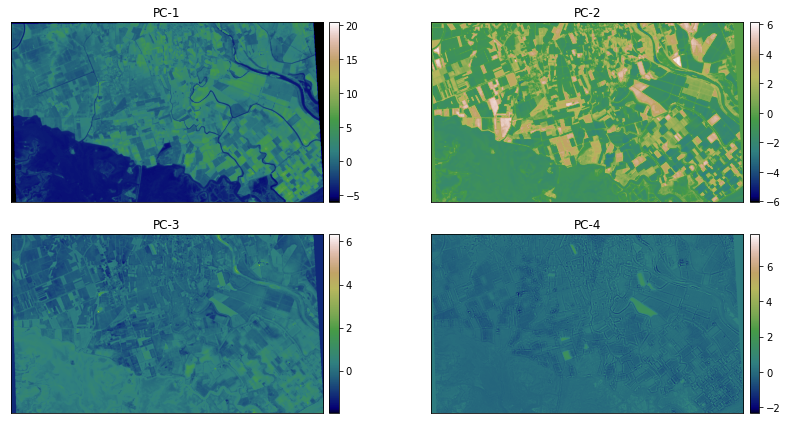

In [17]:
ep.plot_bands(np.moveaxis(data.reshape((689, 1200, data.shape[1])), -1, 0),
              cmap = 'gist_earth',
              cols = 2,
              figsize = (12, 6),
              title = [f'PC-{i}' for i in range(1,5)])

plt.show()

## Incremental PCA

In [22]:
from sklearn.decomposition import IncrementalPCA
from scipy import sparse

transformer = IncrementalPCA(n_components=4, batch_size=800)
X_sparse = sparse.csr_matrix(X_scaled)
X_transformed = transformer.fit_transform(X_sparse)

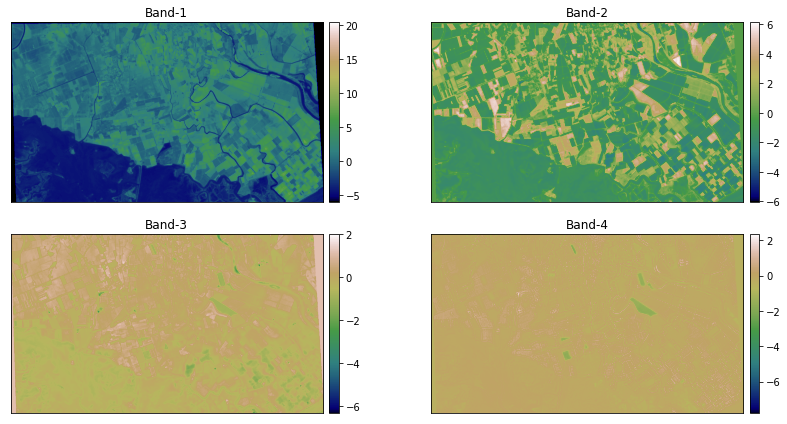

In [23]:
ep.plot_bands(np.moveaxis(X_transformed.reshape((689, 1200, data.shape[1])), -1, 0),
              cmap = 'gist_earth',
              cols = 2,
              figsize = (12, 6),
              title = [f'Band-{i}' for i in range(1,5)])

plt.show()

## Independent Component Analysis (ICA)

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components = 4, random_state=6)


ica_data = ica.fit_transform(X_scaled)


In [19]:
ica_data.shape

(826800, 4)

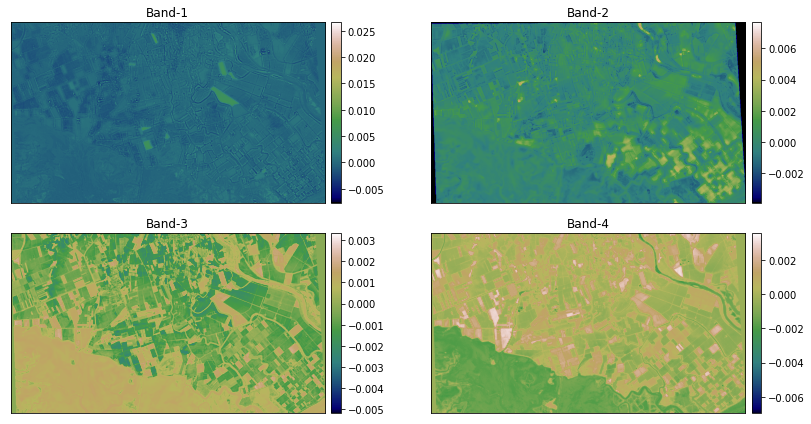

In [20]:
ep.plot_bands(np.moveaxis(ica_data.reshape((689, 1200, data.shape[1])), -1, 0),
              cmap = 'gist_earth',
              cols = 2,
              figsize = (12, 6),
              title = [f'Band-{i}' for i in range(1,5)])

plt.show()



---

